In [6]:
!pip install facemask_detection  > /dev/null

In [7]:
!wget -O taylor.jpeg https://habrastorage.org/webt/ef/am/gt/efamgt7dnc1fo4babeef12ey2gc.jpeg > /dev/null
!wget -O klimova.jpeg https://habrastorage.org/webt/fb/nk/yl/fbnkylcie7uaejtmnlxkneytito.jpeg > /dev/null

--2021-04-09 11:51:10--  https://habrastorage.org/webt/ef/am/gt/efamgt7dnc1fo4babeef12ey2gc.jpeg
Resolving habrastorage.org (habrastorage.org)... 82.192.95.170
Connecting to habrastorage.org (habrastorage.org)|82.192.95.170|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://hsto.org/webt/ef/am/gt/efamgt7dnc1fo4babeef12ey2gc.jpeg [following]
--2021-04-09 11:51:11--  https://hsto.org/webt/ef/am/gt/efamgt7dnc1fo4babeef12ey2gc.jpeg
Resolving hsto.org (hsto.org)... 104.26.12.161, 172.67.71.175, 104.26.13.161, ...
Connecting to hsto.org (hsto.org)|104.26.12.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 568731 (555K) [image/jpeg]
Saving to: ‘taylor.jpeg’

taylor.jpeg         100%[===================>] 555.40K  --.-KB/s    in 0.06s   

2021-04-09 11:51:12 (9.26 MB/s) - ‘taylor.jpeg’ saved [568731/568731]

--2021-04-09 11:51:12--  https://habrastorage.org/webt/fb/nk/yl/fbnkylcie7uaejtmnlxkneytito.jpeg
Resolving habr

In [8]:
!pip install -U pillow > /dev/null

In [9]:
import albumentations as A
import torch
import cv2
import numpy as np

In [10]:
from matplotlib import pyplot as plt
from facemask_detection.pre_trained_models import get_model

In [11]:
plt.rcParams["figure.figsize"] = (10, 10)

In [12]:
model = get_model("tf_efficientnet_b0_ns_2020-07-29")

Downloading: "https://github.com/ternaus/facemask_detection/releases/download/0.0.1/tf_efficientnet_b0_ns_2020-07-29-ffdde352.zip" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b0_ns_2020-07-29-ffdde352.zip


/usr/local/lib/python3.7/dist-packages/torch/hub.py:452: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [13]:
model.eval();

In [14]:
transform = A.Compose([A.SmallestMaxSize(max_size=256, p=1), 
                       A.CenterCrop(height=224, width=224, p=1),
                       A.Normalize(p=1)])

In [15]:
image_taylor = cv2.cvtColor(cv2.imread("taylor.jpeg"), cv2.COLOR_BGR2RGB)
transformed_image = transform(image=image_taylor)['image']

input = torch.from_numpy(np.transpose(transformed_image, (2, 0, 1))).unsqueeze(0)

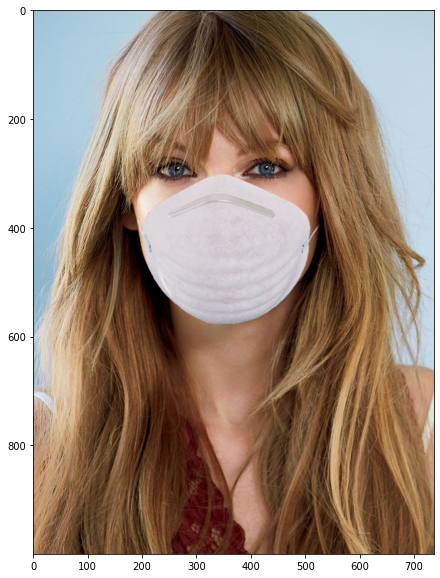

In [16]:
plt.imshow(image_taylor)

In [17]:
print("Probability of the mask on the face = ", model(input)[0].item())

Probability of the mask on the face =  0.9999520778656006


In [18]:
image_klimova = cv2.cvtColor(cv2.imread("klimova.jpeg"), cv2.COLOR_BGR2RGB)
transformed_image = transform(image=image_klimova)['image']

input = torch.from_numpy(np.transpose(transformed_image, (2, 0, 1))).unsqueeze(0)

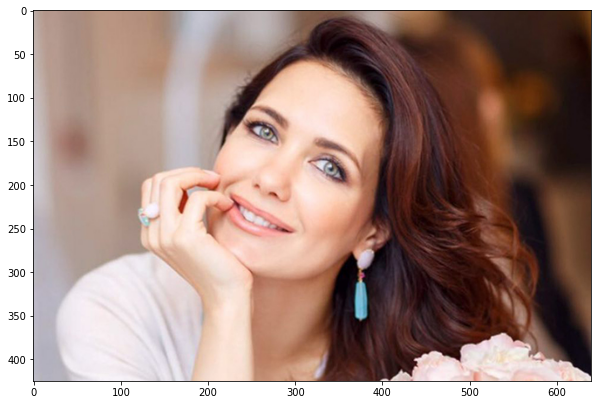

In [19]:
plt.imshow(image_klimova)

In [24]:
print("Probability of the mask on the face = ", model(input)[0].item())

TypeError: ignored